In [1]:
#Import dependencies
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

#Import database configurations
from config import user, database_name

In [2]:
#Connect to postgres database
engine = create_engine(f'postgresql://{user}@localhost:5432/{database_name}')
conn = engine.connect()

In [3]:
#Query * from the salaries tables
salaries_df = pd.read_sql("SELECT * FROM salaries", conn)
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [4]:
#Query * from the employees table
employees_df = pd.read_sql("SELECT * FROM employees", conn)
employees_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,474957,s0001,1963-10-28,Baruch,Trachtenberg,M,1995-10-08
1,20997,s0002,1959-08-27,Make,Antonakopoulos,M,1986-09-21
2,75262,e0003,1959-08-03,Ziva,Harllee,M,1985-12-22
3,419583,s0001,1958-09-12,Ravishankar,Meriste,F,1991-06-15
4,285595,s0001,1956-01-23,Giao,Hammerschmidt,M,1986-01-27


In [5]:
#Query * from the titles table
titles_df = pd.read_sql("SELECT * FROM titles", conn)
titles_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [6]:
#Combine salaries and employees df on emp_no
first_combine = pd.merge(salaries_df, employees_df, on='emp_no')
first_combine.head()

,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [7]:
#Combine the previous df with the titles df on emp_title_id and title_id
final_combine = pd.merge(first_combine, titles_df, left_on='emp_title_id', right_on='title_id')
final_combine.head()

,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,e0003,Senior Engineer
1,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,e0003,Senior Engineer
2,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,e0003,Senior Engineer
3,10006,40000,e0003,1953-04-20,Anneke,Preusig,F,1989-06-02,e0003,Senior Engineer
4,10009,60929,e0003,1952-04-19,Sumant,Peac,F,1985-02-18,e0003,Senior Engineer


In [8]:
#Create a df with only salaries and titles
salaries_titles = final_combine[['salary','title']]
salaries_titles.head()

,salary,title
0,60117,Senior Engineer
1,40006,Senior Engineer
2,40054,Senior Engineer
3,40000,Senior Engineer
4,60929,Senior Engineer


In [9]:
#Check for number of rows
salaries_titles.count()

salary    300024
title     300024
dtype: int64

Text(0.5, 1.0, 'Most Common Salary Ranges')

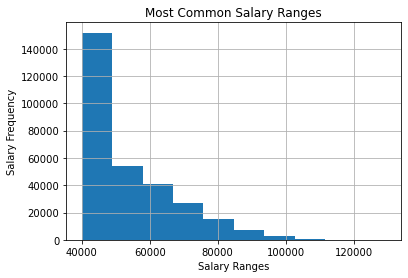

In [10]:
#Create a histogram to visualize the most common salary ranges for employees
salaries_titles.hist(column='salary')
plt.xlabel('Salary Ranges')
plt.ylabel('Salary Frequency')
plt.title('Most Common Salary Ranges')

Text(0.5, 1.0, 'Average Salary by Title')

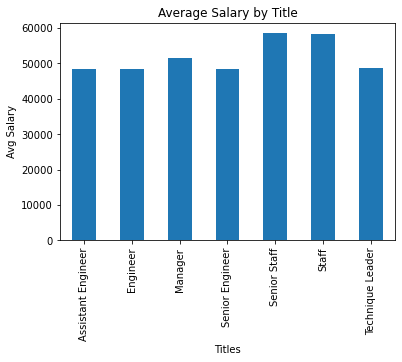

In [11]:
#Create a bar chart of average salary by title
salaries_titles_mean = salaries_titles.groupby(['title'])['salary'].mean()
salaries_titles_mean.plot.bar()
plt.xlabel('Titles')
plt.ylabel('Avg Salary')
plt.title('Average Salary by Title')